# Przetwarzanie Grafiki i Muzyki - laboratorium nr 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1 (1 punkt)
Proszę zmienić kolor 100 wybranym pikselom na obrazie LENA_512.

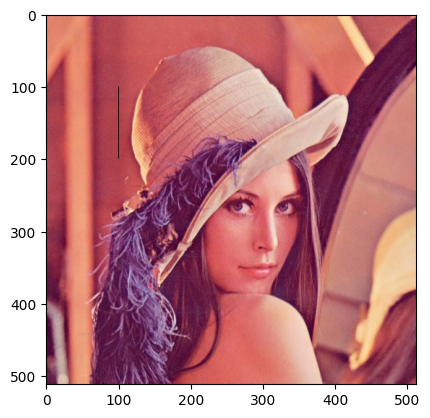

In [42]:
lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)
lena[100:200,100] = [0, 0, 0]
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena)

## Zadanie 2 (1 punkt)
Proszę wyświetlić obraz LENA_512 w odcieniach szarości.

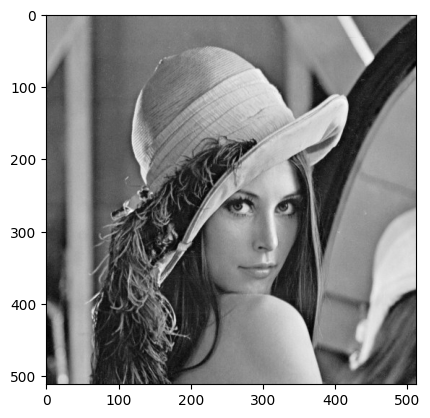

In [50]:
lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
plt.imshow(lena, cmap = plt.cm.gray)

## Zadanie 3 (1 punkt)
Proszę wyświetlić obraz LENA_512 w odcianiach szarości, uśredniając kolory bez użycia funkcji cv2.COLOR_GRAY2RGB.

Aby wykonać to zadanie, można policzyć zwykłą średnią arytmetyczną po wartościach pikseli per kanał. Ale aby uzyskać obraz w odcieniach szarości, który będzie lepiej odpowiadał ludzkiej percepcji, można użyć średniej ważonej:

$$
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B,
$$
gdzie:
* Y - luminancja,
* R - "czerwona" składowa danego piksela,
* G - "zielona" składowa danego piksela,
* B - "niebieska" składowa danego piksela.

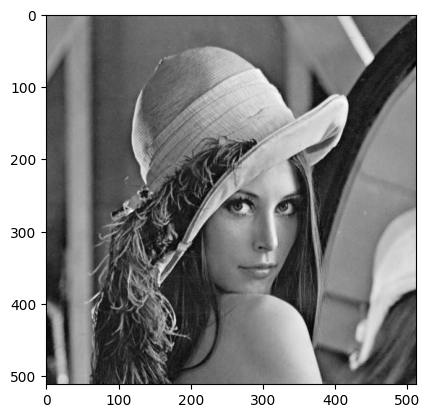

In [85]:
def get_gray(rgb):
    return np.sum(rgb * np.array([0.299, 0.587, 0.114]))

lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)
lena_gray = np.zeros(shape=(lena.shape[0], lena.shape[1]))

for x in range(lena.shape[0]):
    for y in range(lena.shape[1]):
        lena_gray[x,y] = get_gray(lena[x,y])

plt.imshow(lena_gray, cmap = plt.cm.gray)

## Zadanie 4 (1 punkt)
Proszę wyświetlić obrazek: LENA_512 oraz Statek_640_505	jako negatyw (chodzi o model kolorów CMY).

Załóżmy, że dla każdego kanału wartości pikseli to liczby całkowite z przedziału $0-255$. Wówczas negatyw możemy otrzymać poprzez następujące przekształcenia:

* $B' = 255 - B,$
* $G' = 255 - G,$
* $R' = 255 - R,$

gdzie
* R, G, B - wartości składowych danego piksela w modelu RGB,
* R', G', B' - wartości składowych danego piksela w modelu CMY.

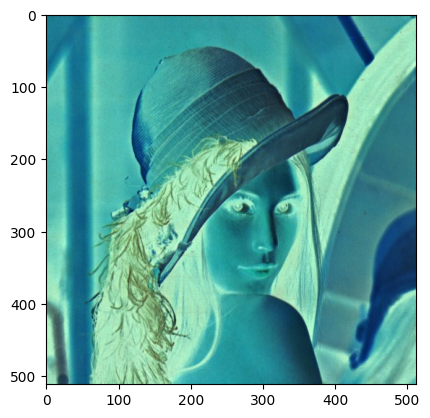

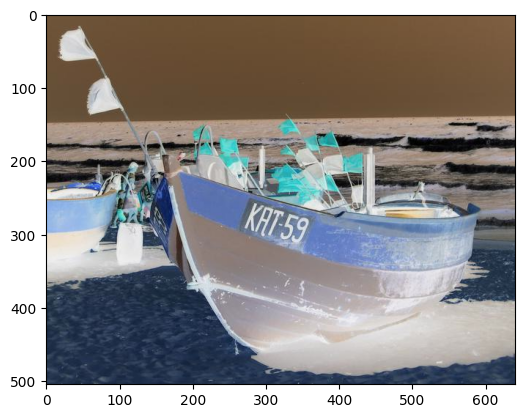

In [105]:
lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)
statek = cv2.imread("./img/statek_640_505.jpg", cv2.IMREAD_UNCHANGED)

lena = 255 - lena
statek = 255 - statek

lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
statek = cv2.cvtColor(statek, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(lena)
plt.figure()
plt.imshow(statek)

## Zadanie 5 (1 punkt)

Proszę wyświetlić obrazy: LENA_512 oraz Statek_640_505 jako sepię, stosując następujące przekształcenia:

 * $B' = \min(255, (R \cdot 0.272) + (G \cdot 0.534) + (G \cdot 0.131)),$
 * $G' = \min(255, (R \cdot 0.349) + (G \cdot 0.686) + (B \cdot 0.168)),$
 * $R' = \min(255, (R \cdot 0.393) + (G \cdot 0.769) + (G \cdot 0.189)),$

 gdzie $R,B,G$ to wartości składowych danego piksela w modelu RGB.

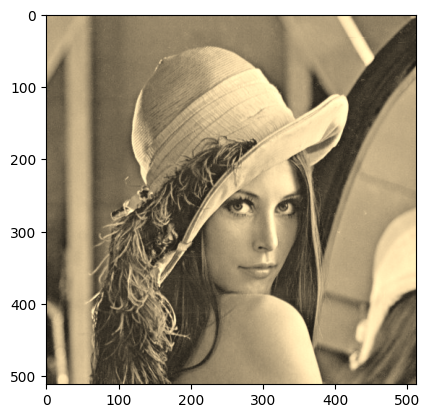

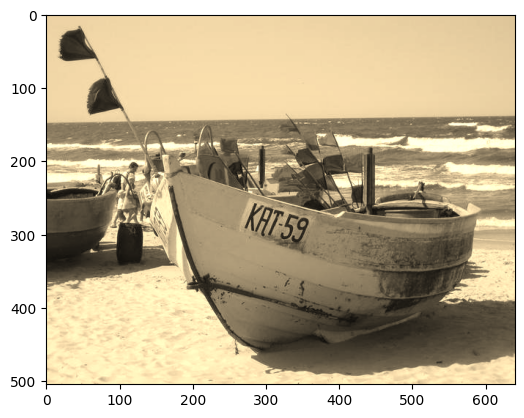

In [139]:
def get_sepia(rgb):
    B = np.min(np.array([255, np.sum(rgb * np.array([0.272, 0.534, 0.131]))]))
    G = np.min(np.array([255, np.sum(rgb * np.array([0.349, 0.686, 0.168]))]))
    R = np.min(np.array([255, np.sum(rgb * np.array([0.393, 0.769, 0.189]))]))
    return R, G, B

lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)
statek = cv2.imread("./img/statek_640_505.jpg", cv2.IMREAD_UNCHANGED)

lena_sepia = np.zeros(shape=(lena.shape[0], lena.shape[1], 3), dtype=np.uint8)
statek_sepia = np.zeros(shape=(statek.shape[0], statek.shape[1], 3), dtype=np.uint8)

for x in range(lena.shape[0]):
    for y in range(lena.shape[1]):
        r, g, b = get_sepia(lena[x,y])
        lena_sepia[x,y][0] = r
        lena_sepia[x,y][1] = g
        lena_sepia[x,y][2] = b
        
for x in range(statek.shape[0]):
    for y in range(statek.shape[1]):
        r, g, b = get_sepia(statek[x,y])
        statek_sepia[x,y][0] = r
        statek_sepia[x,y][1] = g
        statek_sepia[x,y][2] = b


plt.figure()
plt.imshow(lena_sepia)
plt.figure()
plt.imshow(statek_sepia)

## Zadanie 6 (3 punkty)
Proszę wyświetlić obraz LENA_512 obrócony o kąt $30$, $45$, $90$ stopni zgodnie ze wzorem:
$$
x' = x \cos(\theta) -y \sin(\theta)
$$
$$
y'= x sin(\theta) + y cos(\theta)
$$

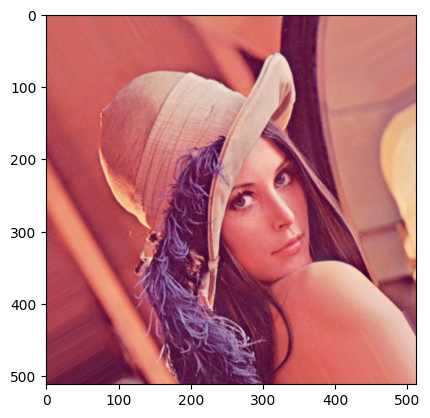

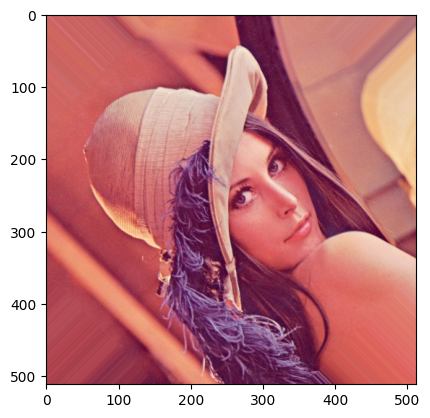

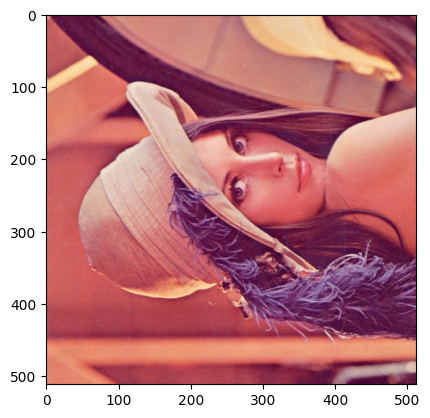

In [13]:
import scipy.ndimage as ndimage

lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)
angles = [30, 45, 90]

for angle in angles:
    plt.figure()
    lenaRotated = ndimage.rotate(lena, angle, reshape=False, mode='nearest')
    lenaRotated = cv2.cvtColor(lenaRotated, cv2.COLOR_RGB2BGR)
    plt.imshow(lenaRotated)

## Zadanie 7 (2 punkty)
Proszę wyświetlić przesunięty obraz LENA_512.

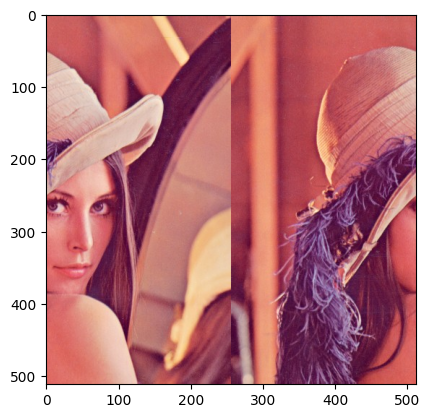

In [5]:
lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_UNCHANGED)

lena = np.roll(lena, 256, axis=1)
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

plt.imshow(lena)